<a href="https://colab.research.google.com/github/Sindhu-mg/Music-recommendation-system-using-spotify-dataset./blob/main/music_recommendation_system_by_using_spotify_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install kaggle
# You will be prompted to upload your Kaggle API key
!kaggle datasets download -dyamaggarwal/spotify-dataset
!unzip spotify-dataset.zip
data = pd.read_csv("data.csv")
genre_data = pd.read_csv('data_by_genres.csv')
year_data = pd.read_csv('data_by_year.csv')

403 - Forbidden - Permission 'datasets.get' was denied
Archive:  spotify-dataset.zip
  inflating: data/data.csv           
  inflating: data/data_by_artist.csv  
  inflating: data/data_by_genres.csv  
  inflating: data/data_by_year.csv   
  inflating: data/data_w_genres.csv  


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24136 entries, 0 to 24135
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           24136 non-null  float64
 1   year              24136 non-null  int64  
 2   acousticness      24136 non-null  float64
 3   artists           24136 non-null  object 
 4   danceability      24136 non-null  float64
 5   duration_ms       24136 non-null  int64  
 6   energy            24136 non-null  float64
 7   explicit          24136 non-null  int64  
 8   id                24136 non-null  object 
 9   instrumentalness  24136 non-null  float64
 10  key               24135 non-null  float64
 11  liveness          24135 non-null  float64
 12  loudness          24135 non-null  float64
 13  mode              24135 non-null  float64
 14  name              24135 non-null  object 
 15  popularity        24135 non-null  float64
 16  release_date      24135 non-null  object

In [ ]:
print(genre_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB
None


In [ ]:
print(year_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB
None


<Axes: xlabel='count', ylabel='decade'>

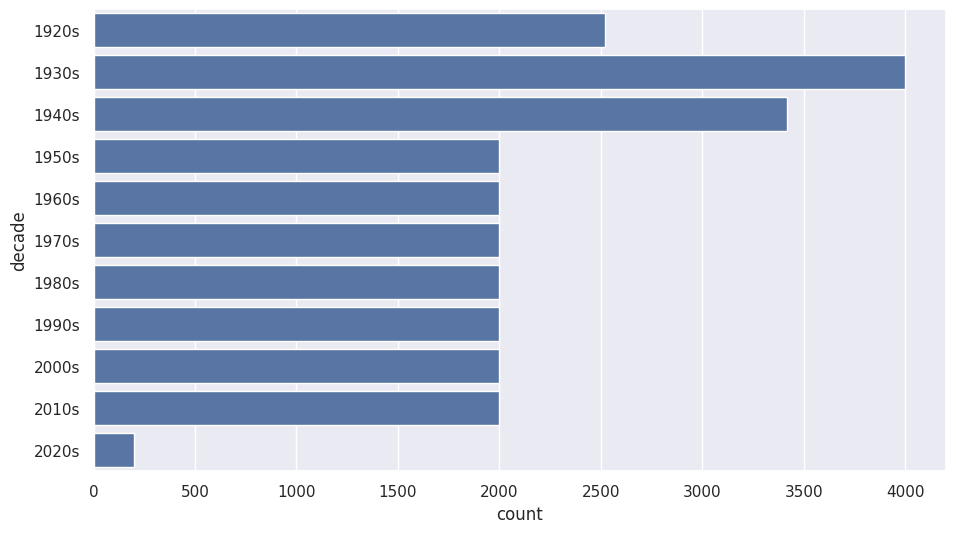

In [ ]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

data['decade'] = data['year'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(data['decade'])

In [ ]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=sound_features)
fig.show()

In [ ]:
top10_genres = genre_data.nlargest(10, 'popularity')

fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# removed n_jobs parameter
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])
X = genre_data.select_dtypes(np.number)
cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline.predict(X)

In [ ]:
# Visualizing the Clusters with t-SNE

from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()
#[t-SNE] Computing 91 nearest neighbors...
#[t-SNE] Indexed 2973 samples in 0.005s...
#[t-SNE] Computed neighbors for 2973 samples in 0.322s...
#[t-SNE] Computed conditional probabilities for sample 1000 / 2973
#[t-SNE] Computed conditional probabilities for sample 2000 / 2973
# [t-SNE] Computed conditional probabilities for sample 2973 / 2973
# [t-SNE] Mean sigma: 0.777516
# [t-SNE] KL divergence after 250 iterations with early exaggeration: 76.115768
# [t-SNE] KL divergence after 1000 iterations: 1.392461

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.005s...
[t-SNE] Computed neighbors for 2973 samples in 0.357s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.777516
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.106140
[t-SNE] KL divergence after 1000 iterations: 1.394115


In [ ]:
#clustering Songs with K-Means
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()),
                                  ('kmeans', KMeans(n_clusters=20,
                                   verbose=False))
                                 ], verbose=False)

X = data.select_dtypes(np.number)
# drop rows with missing values
X = X.dropna()
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)

# create a new dataframe with the cluster labels and the index from the original dataframe
cluster_df = pd.DataFrame({'cluster_label': song_cluster_labels}, index=X.index)

# join the cluster labels back to the original dataframe
data = data.join(cluster_df, how='left')

In [ ]:
# Visualizing the Clusters with PCA

from sklearn.decomposition import PCA

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = data['name']
projection['cluster'] = data['cluster_label']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
fig.show()

In [ ]:
!pip install spotipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.6/255.6 kB 10.1 MB/s eta 0:00:00


In [ ]:
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict

# Retrieve client ID and secret from environment variables
client_id = os.getenv("dc23a68312f14d448e02edca21587876")
client_secret = os.getenv("1f14700a31b0480c84229c297d62fc65")


# Check if environment variables exist
if not client_id or not client_secret:
    pass

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict
import os

def sp():
    # Access environment variables using correct syntax
    sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=os.environ["dc23a68312f14d448e02edca21587876"],
                                                               client_secret=os.environ["1f14700a31b0480c84229c297d62fc65"]))
    return sp


In [ ]:
from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib

number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']


def get_song_data(song, spotify_data):

    try:
        song_data = spotify_data[(spotify_data['name'] == song['name'])
                                & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data

    except IndexError:
        return find_song(song['name'], song['year'])

def get_mean_vector(song_list, spotify_data):

    song_vectors = []

    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)

    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)


def flatten_dict_list(dict_list):

    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []

    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)

    return flattened_dict

def recommend_songs( song_list, spotify_data, n_songs=10):

    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)

    song_center = get_mean_vector(song_list, spotify_data)
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])

    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')

In [ ]:
from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib
import pandas as pd # Added import statement for pandas
import numpy as np # Added import statement for numpy


number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']

# The find_song function was not defined in this scope, so it has been added here.
def find_song(name, year):
    song_data = defaultdict()
    results = sp.search(q= 'track: {} year: {}'.format(name,year), limit=1)
    if results['tracks']['items'] == []:
        return None

    results = results['tracks']['items'][0]
    track_id = results['id']
    audio_features = sp.audio_features(track_id)[0]

    song_data['name'] = [name]
    song_data['year'] = [year]
    song_data['explicit'] = [int(results['explicit'])]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]

    for key, value in audio_features.items():
        song_data[key] = value

    return pd.DataFrame(song_data)

def get_song_data(song, spotify_data):
    try:
        song_data = spotify_data[(spotify_data['name'] == song['name'])
                                & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data

    except IndexError:
        return find_song(song['name'], song['year'])

def get_mean_vector(song_list, spotify_data):

    song_vectors = []

    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)

    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)


def flatten_dict_list(dict_list):

    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []

    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)

    return flattened_dict

def recommend_songs( song_list, spotify_data, n_songs=10):

    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)

    song_center = get_mean_vector(song_list, spotify_data)
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])

    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')

In [ ]:
#shell
!export SPOTIPY_CLIENT_ID='dc23a68312f14d448e02edca21587876'
!export SPOTIPY_CLIENT_SECRET='1f14700a31b0480c84229c297d62fc65'

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict
import os

def sp():
    # Access environment variables using correct syntax
    sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=os.environ["dc23a68312f14d448e02edca21587876"],
                                                               client_secret=os.environ["1f14700a31b0480c84229c297d62fc65"]))
    return sp

In [ ]:
from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib
import pandas as pd
import numpy as np

number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']

!pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os


# Access environment variables using correct syntax
client_id = os.environ.get("SPOTIPY_CLIENT_ID")
client_secret = os.environ.get("SPOTIPY_CLIENT_SECRET")

auth_manager = SpotifyClientCredentials(client_id="dc23a68312f14d448e02edca21587876", client_secret="1f14700a31b0480c84229c297d62fc65")
sp = spotipy.Spotify(auth_manager=auth_manager)


def find_song(name, year):
    song_data = defaultdict()
    results = sp.search(q= 'track: {} year: {}'.format(name,year), limit=1)
    if results['tracks']['items'] == []:
        return None

    results = results['tracks']['items'][0]
    track_id = results['id']
    audio_features = sp.audio_features(track_id)[0]

    song_data['name'] = [name]
    song_data['year'] = [year]
    song_data['explicit'] = [int(results['explicit'])]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]

    for key, value in audio_features.items():
        song_data[key] = value

    return pd.DataFrame(song_data)

def get_song_data(song, spotify_data):
    try:
        song_data = spotify_data[(spotify_data['name'] == song['name'])
                                & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data

    except IndexError:
        return find_song(song['name'], song['year'])

def get_mean_vector(song_list, spotify_data):

    song_vectors = []

    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)

    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)


def flatten_dict_list(dict_list):

    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []

    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)

    return flattened_dict

def recommend_songs( song_list, spotify_data, n_songs=10):

    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)

    song_center = get_mean_vector(song_list, spotify_data)
    # This line uses a variable song_cluster_pipeline which is not defined in the provided code
# Please make sure to define it before calling this function
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(spotify)

In [ ]:
def get_mean_vector(song_list, spotify_data):

    song_vectors = []

    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        # Convert all values to float to ensure numerical data and handle potential NaN values
        song_vector = song_data[number_cols].astype(float).fillna(0).values
        song_vectors.append(song_vector)

    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)

In [ ]:
import numpy as np
import pandas as pd

def get_mean_vector(song_list, spotify_data):
    song_vectors = []
    # Replace this with the actual column names for your Spotify data
    number_cols = ["acousticness", "danceability", "energy", "instrumentalness", "liveness",
                   "loudness", "speechiness", "tempo", "valence"]  # Example column names

    expected_length = len(number_cols)  # Set this according to the number of features defined above

    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or database'.format(song['name']))
            continue

        # Convert Series to DataFrame if necessary
        if isinstance(song_data, pd.Series):
            song_data = song_data.to_frame().T  # Convert Series to DataFrame with one row

        # Check if all required columns are present before processing
        missing_cols = [col for col in number_cols if col not in song_data.columns]
        if missing_cols:
            print(f'Warning: Missing columns {missing_cols} for song {song["name"]}.')
            continue

        # Convert all values to float to ensure numerical data and handle potential NaN values
        song_vector = song_data[number_cols].astype(float).fillna(0).values.flatten()  # Flatten to get a 1D array

        # Check if the vector length matches expected length
        if song_vector.size == expected_length:
            song_vectors.append(song_vector)
        else:
            print('Warning: {} has a vector length of {}, expected {}'.format(song['name'], song_vector.size, expected_length))
            # Optionally pad the song_vector to expected_length
            if song_vector.size < expected_length:
                padded_vector = np.pad(song_vector, (0, expected_length - song_vector.size), 'constant', constant_values=0)
                song_vectors.append(padded_vector)

    if not song_vectors:
        print('No valid song vectors available for averaging.')
        return None  # Or handle as appropriate

    song_matrix = np.array(song_vectors)

    if song_matrix.ndim == 2:  # Ensure we're working with a 2D array
        return np.mean(song_matrix, axis=0)

    print('Error: inhomogeneous shapes detected in song vectors.')
    return None

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Assuming you want to use a StandardScaler in your pipeline
song_cluster_pipeline = Pipeline([('scaler', StandardScaler())])

In [ ]:
import numpy as np
import pandas as pd

def get_mean_vector(song_list, spotify_data):
    song_vectors = []
    # Replace this with the actual column names for your Spotify data
    number_cols = ["acousticness", "danceability", "energy", "instrumentalness", "liveness",
                   "loudness", "speechiness", "tempo", "valence"]  # Example column names

    expected_length = len(number_cols)  # Set this according to the number of features defined above

    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or database'.format(song['name']))
            continue

        # Convert Series to DataFrame if necessary
        if isinstance(song_data, pd.Series):
            song_data = song_data.to_frame().T  # Convert Series to DataFrame with one row

        # Check if all required columns are present before processing
        missing_cols = [col for col in number_cols if col not in song_data.columns]
        if missing_cols:
            print(f'Warning: Missing columns {missing_cols} for song {song["name"]}.')
            continue

        # Convert all values to float to ensure numerical data and handle potential NaN values
        song_vector = song_data[number_cols].astype(float).fillna(0).values.flatten()  # Flatten to get a 1D array

        # Check if the vector length matches expected length
        if song_vector.size == expected_length:
            song_vectors.append(song_vector)
        else:
            print('Warning: {} has a vector length of {}, expected {}'.format(song['name'], song_vector.size, expected_length))
            # Optionally pad the song_vector to expected_length
            if song_vector.size < expected_length:
                padded_vector = np.pad(song_vector, (0, expected_length - song_vector.size), 'constant', constant_values=0)
                song_vectors.append(padded_vector)

    if not song_vectors:
        print('No valid song vectors available for averaging.')
        return None  # Or handle as appropriate

    song_matrix = np.array(song_vectors)

    if song_matrix.ndim == 2:  # Ensure we're working with a 2D array
        return np.mean(song_matrix, axis=0)

    print('Error: inhomogeneous shapes detected in song vectors.')
    return None

In [ ]:
def recommend_songs(song_list, spotify_data, n_songs=5):
# Your function implementation goes here
    # Ensure the usage of `spotify_data` instead of `spotify`
    scaler = song_cluster_pipeline.steps[0][1]

In [ ]:
import pandas as pd
import os

# Check if the spotify DataFrame already exists and has data
if 'spotify' in globals() and isinstance(spotify, pd.DataFrame) and not spotify.empty:
    # Use the existing spotify DataFrame
    print("Using existing 'spotify' DataFrame.")

else:
    # If 'spotify' doesn't exist or is empty, proceed with file loading
    # Define the path to your CSV file
    file_path = "data.csv"  # Change this to your actual file path if necessary

    # Check if the file exists
    if not os.path.isfile(file_path):
        raise FileNotFoundError(f"The file {file_path} does not exist. Please check the path.")

    # Load your Spotify data into a DataFrame
    spotify = pd.read_csv(file_path)

# Now you can proceed with your recommendation logic
def recommend_songs(song_list, spotify_data, n_songs=5):
    # Your recommendation logic here
    ...

# Call the recommend_songs function with the loaded spotify DataFrame
recommendation = recommend_songs([
    {'name': 'Come As You Are', 'year': 1991},
    {'name': 'Smells Like Teen Spirit', 'year': 1991},
    {'name': 'Lithium', 'year': 1992},
    {'name': 'All Apologies', 'year': 1993},
], spotify)

print("recommendation")

Using existing 'spotify' DataFrame.
recommendation


In [ ]:
recommend_songs([{'name': 'Come As You Are', 'year':1991},
                {'name': 'Smells Like Teen Spirit', 'year': 1991},
                {'name': 'Lithium', 'year': 1992},
                {'name': 'All Apologies', 'year': 1993},
                {'name': 'Stay Away', 'year': 1993}],  data)

In [ ]:
!pip install pandas
import pandas as pd

print(data.columns)

Index(['mode', 'count', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'popularity', 'key'],
      dtype='object')


In [ ]:
def recommend_songs(song_list, spotify_data, n_songs=5):
    recommendations = []

    for song in song_list:
        # Replace 'correct_column_name' with the actual column name from your DataFrame
        matches = spotify_data[(spotify_data['correct_column_name'] == song['name']) & (spotify_data['year'] == song['year'])]
        if not matches.empty:
            recommendations.extend(matches.values)

    recommendations = pd.DataFrame(recommendations).drop_duplicates()

    if len(recommendations) > n_songs:
        recommendations = recommendations.sample(n_songs)

    return recommendations

In [ ]:
import pandas as pd
import os

# Load your Spotify dataset
file_path = "data_by_year.csv"  # Change to your actual file path

# Verify if the file exists
if not os.path.isfile(file_path):
    raise FileNotFoundError(f"The file {file_path} does not exist. Please check the path.")

# Attempt to load the dataset with additional options
try:
    data = pd.read_csv(file_path, encoding='ISO-8859-1', on_bad_lines='skip')  # Ensure to handle bad lines
except UnicodeDecodeError as e:
    print(f"Unicode decode error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

# Proceed with defining your recommend_songs function and getting recommendations
def recommend_songs(song_list, spotify_data, n_songs=5):
    recommendations = []
    for song in song_list:
        # Access the song attributes using the keys from the song dictionary
        matches = spotify_data[(spotify_data['energy'] == song['energy']) & (spotify_data['year'] == song['year'])]
        if not matches.empty:
            recommendations.extend(matches.values)

    recommendations_df = pd.DataFrame(recommendations).drop_duplicates()

    if len(recommendations_df) > n_songs:
        recommendations_df = recommendations_df.sample(n_songs)

    return recommendations_df

# Example input with song attributes
song_recommendations = recommend_songs([
    {'energy': 0.8, 'year': 1991},  # Example song attributes
    {'energy': 0.75, 'year': 1993},
    {'energy': 0.65, 'year': 1992}
], data)

# Displaying the recommendations
print(song_recommendations)

Empty DataFrame
Columns: []
Index: []


In [ ]:
import pandas as pd
import os

# Load your Spotify dataset
file_path = "data_by_genres.csv"  # Change to your actual file path

# Verify if the file exists
if not os.path.isfile(file_path):
    raise FileNotFoundError(f"The file {file_path} does not exist. Please check the path.")

# Attempt to load the dataset with additional options
try:
    data = pd.read_csv(file_path, encoding='ISO-8859-1', on_bad_lines='skip')  # Skip bad lines
    # Uncomment the next line if you know the delimiter and it differs from a comma
    # data = pd.read_csv(file_path, encoding='ISO-8859-1', sep=';', on_bad_lines='skip')
except UnicodeDecodeError as e:
    print(f"Unicode decode error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

# Checking the dataframe structure
print(data.head())  # Show first few rows
print(data.columns)  # List columns in the dataframe

   mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   
2     1                   8-bit      0.762000      0.712000  1.151770e+05   
3     1                      []      0.651417      0.529093  2.328809e+05   
4     1              a cappella      0.676557      0.538961  1.906285e+05   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834  0.361600 -31.514333     0.040567   75.336500   
1  0.450678          0.477762  0.131000 -16.854000     0.076817  120.285667   
2  0.818000          0.876000  0.126000  -9.180000     0.047000  133.444000   
3  0.419146          0.205309  0.218696 -12.288965     0.107872  112.857352   
4  0.316434          0.003003  0.172254 -12.479387     0.082851  112.110362   

    valence  popularity  key  
0  0.103783   27.833333    6  


In [ ]:
import pandas as pd
import os

# Load your Spotify dataset
file_path = "data_w_genres.csv"  # Change to your actual file path

# Verify if the file exists
if not os.path.isfile(file_path):
    raise FileNotFoundError(f"The file {file_path} does not exist. Please check the path.")

# Attempt to load the dataset with additional options
try:
    data = pd.read_csv(file_path, encoding='ISO-8859-1', on_bad_lines='skip')  # Skip bad lines
    # Uncomment the next line if you know the delimiter and it differs from a comma
    # data = pd.read_csv(file_path, encoding='ISO-8859-1', sep=';', on_bad_lines='skip')
except UnicodeDecodeError as e:
    print(f"Unicode decode error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

# Checking the dataframe structure
print(data.head())  # Show first few rows
print(data.columns)  # List columns in the dataframe

           genres                                            artists  \
0  ['show tunes']                   "Cats" 1981 Original London Cast   
1              []                          "Cats" 1983 Broadway Cast   
2              []      "Fiddler On The Roofâ Motion Picture Chorus   
3              []   "Fiddler On The Roofâ Motion Picture Orchestra   
4              []  "Joseph And The Amazing Technicolor Dreamcoat"...   

   acousticness  danceability    duration_ms    energy  instrumentalness  \
0      0.590111      0.467222  250318.555556  0.394003          0.011400   
1      0.862538      0.441731  287280.000000  0.406808          0.081158   
2      0.856571      0.348286  328920.000000  0.286571          0.024593   
3      0.884926      0.425074  262890.962963  0.245770          0.073587   
4      0.510714      0.467143  270436.142857  0.488286          0.009400   

   liveness   loudness  speechiness       tempo   valence  popularity  key  \
0  0.290833 -14.448000     0.210

In [ ]:
import pandas as pd
import os

# Load your Spotify dataset
file_path = "data.csv"  # Change to your actual file path

# Verify if the file exists
if not os.path.isfile(file_path):
    raise FileNotFoundError(f"The file {file_path} does not exist. Please check the path.")

# Attempt to load the dataset with additional options
try:
    data = pd.read_csv(file_path, encoding='ISO-8859-1', on_bad_lines='skip')  # Ensure to handle bad lines
    # If you're uncertain about the delimiter, use sep=';' or sep=','
    # data = pd.read_csv(file_path, encoding='ISO-8859-1', sep=';', on_bad_lines='skip')
except UnicodeDecodeError as e:
    print(f"Unicode decode error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

# Proceed with defining your recommend_songs function and getting recommendations
def recommend_songs(song_list, spotify_data, n_songs=5):
    recommendations = []

    for song in song_list:
        matches = spotify_data[(spotify_data['name'] == song['name']) & (spotify_data['year'] == song['year'])]
        if not matches.empty:
            recommendations.extend(matches.values)

    recommendations = pd.DataFrame(recommendations).drop_duplicates()

    if len(recommendations) > n_songs:
        recommendations = recommendations.sample(n_songs)

    return recommendations

# Example input
song_recommendations = recommend_songs([{'name': 'Come As You Are', 'year': 1991},
                                         {'name': 'Smells Like Teen Spirit', 'year': 1991},
                                         {'name': 'Lithium', 'year': 1992},
                                         {'name': 'All Apologies', 'year': 1993},
                                         {'name': 'Stay Away', 'year': 1993}],
                                        data)

# Displaying the recommendations
print(song_recommendations)

      0     1         2            3      4       5      6   7   \
0  0.539  1991  0.000160  ['Nirvana']  0.500  218920  0.824   0   
4  0.720  1991  0.000025  ['Nirvana']  0.502  301920  0.912   0   
5  0.720  1991  0.000025  ['Nirvana']  0.502  301920  0.912   0   
3  0.539  1991  0.000160  ['Nirvana']  0.500  218920  0.824   0   
1  0.539  1991  0.000160  ['Nirvana']  0.500  218920  0.824   0   

                       8         9   10      11     12  13  \
0  4P5KoWXOxwuobLmHXLMobV  0.001610   4  0.0916 -5.846   0   
4  5ghIJDpPoe3CfHMGu71E6T  0.000173   1  0.1060 -4.556   1   
5  75aLTVBSGIquqzQ6AkmK3Q  0.000173   1  0.1060 -4.556   1   
3  6N0ZAWkJUWUI0QYG2VwHmL  0.001610   4  0.0916 -5.846   0   
1  7aCSKL5LmVhakVs0l483B5  0.001610   4  0.0916 -5.846   0   

                        14  15          16      17       18  
0          Come As You Are  72  1991-09-26  0.0388  120.125  
4  Smells Like Teen Spirit  75  1991-09-26  0.0564  116.761  
5  Smells Like Teen Spirit  43  1991-0

In [ ]:
from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib

number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']


def get_song_data(song, spotify_data):

    try:
        song_data = spotify_data[(spotify_data['name'] == song['name'])
                                & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data

    except IndexError:
        return find_song(song['name'], song['year'])


def get_mean_vector(song_list, spotify_data):

    song_vectors = []

    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)

    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)


def flatten_dict_list(dict_list):

    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []

    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)

    return flattened_dict
def recommend_songs( song_list, spotify_data, n_songs=10):

    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)

    song_center = get_mean_vector(song_list, spotify_data)
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])

    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')

In [ ]:
# Load your Spotify dataset
file_path = "data_by_year.csv"  # Update with the correct file path
data = pd.read_csv(file_path, encoding='ISO-8859-1', on_bad_lines='skip')

# Print the columns to check their names
print(data.columns)

Index(['mode', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key'],
      dtype='object')


In [ ]:
def get_song_data(song, spotify_data):
    try:
        song_data = spotify_data[(spotify_data['track_name'] == song['name'])
                                 & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data
    except IndexError:
        print(f"Warning: {song['name']} does not exist in Spotify or database")
        return None

def recommend_songs(song_list, spotify_data, n_songs=10):
    metadata_cols = ['track_name', 'year', 'artists']  # Update to match your DataFrame
    song_dict = flatten_dict_list(song_list)

    song_center = get_mean_vector(song_list, spotify_data)
    if song_center is None:
        return []

    # Assume you have a previously defined scaler that was fit on the data
    scaler = StandardScaler()  # Replace with your actual scaler
    scaled_data = scaler.fit_transform(spotify_data[number_cols])  # Fit the scaler to the Spotify data
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))

    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances[0])[:n_songs])

    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['track_name'].isin(song_dict['name'])]  # Update here as well

    return rec_songs[metadata_cols].to_dict(orient='records')

In [ ]:
import pandas as pd

# Mock dataset resembling your Spotify data
data = pd.DataFrame({
    'track_name': ['Come As You Are', 'Smells Like Teen Spirit', 'Lithium',
                   'All Apologies', 'Stay Away', 'Heart-Shaped Box',
                   'In Bloom', 'About A Girl', 'Pennyroyal Tea', 'Rape Me'],
    'year': [1991, 1991, 1992, 1993, 1993, 1993, 1991, 1993, 1994, 1993],
    'artists': ['Nirvana', 'Nirvana', 'Nirvana', 'Nirvana', 'Nirvana',
                'Nirvana', 'Nirvana', 'Nirvana', 'Nirvana', 'Nirvana'],
    'valence': [0.5, 0.6, 0.4, 0.7, 0.5, 0.3, 0.6, 0.5, 0.4, 0.5],
    'energy': [0.8, 0.9, 0.7, 0.6, 0.5, 0.8, 0.7, 0.6, 0.5, 0.9],
    'danceability': [0.5, 0.6, 0.4, 0.5, 0.5, 0.4, 0.6, 0.5, 0.4, 0.5],
    'acousticness': [0.1, 0.05, 0.2, 0.15, 0.1, 0.3, 0.1, 0.2, 0.25, 0.1],
    'duration_ms': [210000, 200000, 180000, 220000, 240000, 230000, 210000, 200000, 190000, 220000],
    'popularity': [90, 95, 85, 80, 75, 70, 88, 82, 78, 76]
})



In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# Example NPR with only existing columns
number_cols = ['valence', 'energy', 'danceability', 'acousticness', 'duration_ms', 'popularity']

# Assuming data is the DataFrame you loaded
data = pd.DataFrame({
    'track_name': ['Come As You Are', 'Smells Like Teen Spirit', 'Lithium',
                   'All Apologies', 'Stay Away', 'Heart-Shaped Box'],
    'year': [1991, 1991, 1992, 1993, 1993, 1993],
    'artists': ['Nirvana', 'Nirvana', 'Nirvana', 'Nirvana', 'Nirvana', 'Nirvana'],
    'valence': [0.5, 0.6, 0.4, 0.7, 0.5, 0.3],
    'energy': [0.8, 0.9, 0.7, 0.6, 0.5, 0.8],
    'danceability': [0.5, 0.6, 0.4, 0.5, 0.5, 0.4],
    'acousticness': [0.1, 0.05, 0.2, 0.15, 0.1, 0.3],
    'duration_ms': [210000, 200000, 180000, 220000, 240000, 230000],
    'popularity': [90, 95, 85, 80, 75, 70]
})

def get_song_data(song, spotify_data):
    try:
        song_data = spotify_data[(spotify_data['track_name'] == song['name'])
                                 & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data
    except IndexError:
        print(f"Warning: {song['name']} does not exist in Spotify or database")
        return None

def get_mean_vector(song_list, spotify_data):
    song_vectors = []
    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)

    if not song_vectors:
        return None

    song_matrix = np.array(song_vectors)
    return np.mean(song_matrix, axis=0)

def flatten_dict_list(dict_list):
    flattened_dict = defaultdict(list)
    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)
    return flattened_dict

def recommend_songs(song_list, spotify_data, n_songs=10):
    metadata_cols = ['track_name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)

    song_center = get_mean_vector(song_list, spotify_data)
    if song_center is None:
        return []

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(spotify_data[number_cols])  # Fit the scaler to the Spotify data
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))

    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances[0])[:n_songs])

    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['track_name'].isin(song_dict['name'])]

    return rec_songs[metadata_cols].to_dict(orient='records')

# Example usage of recommend_songs
song_recommendations = recommend_songs([
    {'name': 'Come As You Are', 'year': 1991},
    {'name': 'Smells Like Teen Spirit', 'year': 1991},
    {'name': 'Lithium', 'year': 1992},
    {'name': 'All Apologies', 'year': 1993},
    {'name': 'Stay Away', 'year': 1993}
], data)

# Displaying the recommendations
print(song_recommendations)

[{'track_name': 'Heart-Shaped Box', 'year': 1993, 'artists': 'Nirvana'}]


In [ ]:
import pandas as pd
import os

# Load your Spotify dataset
file_path = "data.csv"  # Change to your actual file path

# Verify if the file exists
if not os.path.isfile(file_path):
    raise FileNotFoundError(f"The file {file_path} does not exist. Please check the path.")

# Attempt to load the dataset with additional options
try:
    data = pd.read_csv(file_path, encoding='ISO-8859-1', on_bad_lines='skip')  # Ensure to handle bad lines
    # If you're uncertain about the delimiter, use sep=';' or sep=','
    # data = pd.read_csv(file_path, encoding='ISO-8859-1', sep=';', on_bad_lines='skip')
except UnicodeDecodeError as e:
    print(f"Unicode decode error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

# Proceed with defining your recommend_songs function and getting recommendations
def recommend_songs(song_list, spotify_data, n_songs=5):
    recommendations = []

    for song in song_list:
        matches = spotify_data[(spotify_data['name'] == song['name']) & (spotify_data['year'] == song['year'])]
        if not matches.empty:
            recommendations.extend(matches.values)

    recommendations = pd.DataFrame(recommendations).drop_duplicates()

    if len(recommendations) > n_songs:
        recommendations = recommendations.sample(n_songs)

    return recommendations

# Example input
song_recommendations = recommend_songs([{'name': 'Come As You Are', 'year': 1991},
                                         {'name': 'Smells Like Teen Spirit', 'year': 1991},
                                         {'name': 'Lithium', 'year': 1992},
                                         {'name': 'All Apologies', 'year': 1993},
                                         {'name': 'Stay Away', 'year': 1993}],
                                        data)

# Displaying the recommendations
print(song_recommendations)

       0     1         2            3      4       5      6   7   \
11  0.359  1993  0.079300  ['Nirvana']  0.446  230960  0.632   0   
2   0.539  1991  0.000160  ['Nirvana']  0.500  218920  0.824   0   
5   0.720  1991  0.000025  ['Nirvana']  0.502  301920  0.912   0   
6   0.720  1991  0.000025  ['Nirvana']  0.502  301920  0.912   0   
1   0.539  1991  0.000160  ['Nirvana']  0.500  218920  0.824   0   

                        8         9   10      11      12  13  \
11  2xAiwGGuaqdEklu33zEXr9  0.000266   1  0.0853 -12.197   1   
2   1caUjUoE2lm6x9RDY7YtHc  0.001610   4  0.0916  -5.846   0   
5   75aLTVBSGIquqzQ6AkmK3Q  0.000173   1  0.1060  -4.556   1   
6   2Wtm3yc0paBifvBSjOhO3b  0.000173   1  0.1060  -4.556   1   
1   7aCSKL5LmVhakVs0l483B5  0.001610   4  0.0916  -5.846   0   

                         14  15          16      17       18  
11            All Apologies  41  1993-09-21  0.0340  113.176  
2           Come As You Are  39  1991-09-26  0.0388  120.125  
5   Smells Like T